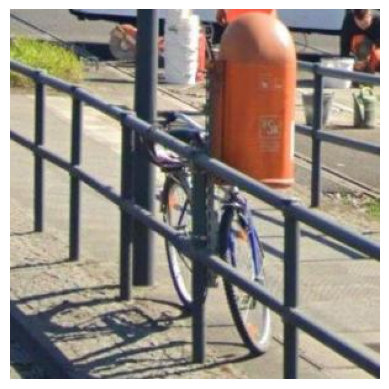

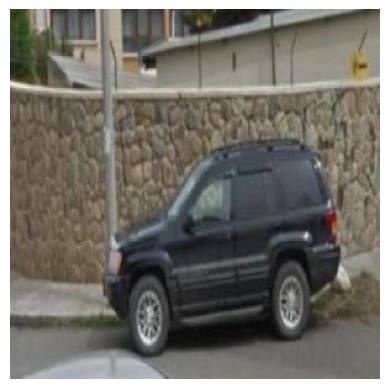

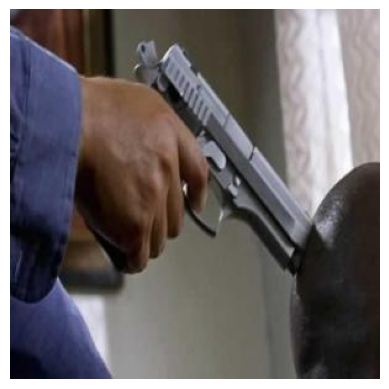

In [3]:
#CHECK IMAGE FROM DATA SET 

import cv2
import os
from matplotlib import pyplot as plt

# DATAPATH
test_path = "/kaggle/input/26-class-object-detection-dataset/Senior-Design-VIAD-4/test"
train_path = "/kaggle/input/26-class-object-detection-dataset/Senior-Design-VIAD-4/train"
valid_path = "/kaggle/input/26-class-object-detection-dataset/Senior-Design-VIAD-4/valid"

# FUNCTION TO CREATE IMAGE 
def display_image(image_path):
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    plt.imshow(image_rgb)
    plt.axis('off')
    plt.show()

# DISPLAY AN IMAGE FROM TRAIN PATH
train_images = os.listdir(train_path)
if train_images:
    sample_image_path = os.path.join(train_path, train_images[0])
    display_image(sample_image_path)
else:
    print("No images found in the train path.")
    
# DISPLAY AN IMAGE FROM TEST PATH
test_images = os.listdir(test_path)
if test_images:
    sample_image_path = os.path.join(test_path, test_images[0])
    display_image(sample_image_path)
else:
    print("No images found in the test path.")
    
    
    
 # DISPLAY AN IMAGE FROM TEST PATH
valid_images = os.listdir(valid_path)
if valid_images:
    sample_image_path = os.path.join(valid_path, valid_images[0])
    display_image(sample_image_path)
else:
    print("No images found in the valid path.")
       
    

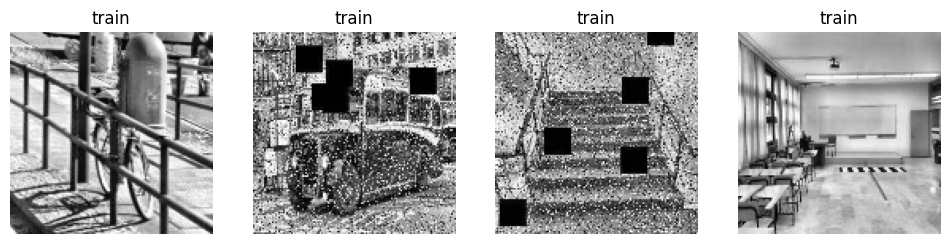

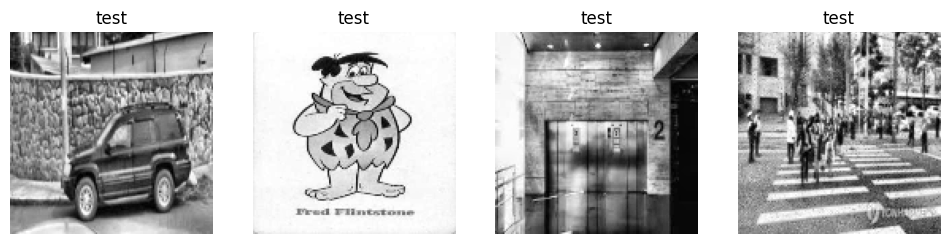

Shape of X_train: (27740, 128, 128, 1)
Shape of y_train: (27740, 2)
Shape of X_test: (6936, 128, 128, 1)
Shape of y_test: (6936, 2)


In [7]:
#PREPROCESS

import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt

# FUNCTION TO LOAD AND PREPROCESS IMAGE
def load_and_preprocess_images(directory, label, image_size=(128, 128), clahe_clip_limit=2.0):
    images = []
    labels = []

    for filename in os.listdir(directory):
        if filename.endswith(".jpg"):
            file_path = os.path.join(directory, filename)
            img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, image_size)

            # Apply CLAHE (CONTRAST LIMITED ADAPTIVE HISTOGRAM EQUALIZATION)
            clahe = cv2.createCLAHE(clipLimit=clahe_clip_limit)
            img = clahe.apply(img)

            images.append(img)
            labels.append(label)

    return images, labels

# DATAPATH
train_path = "/kaggle/input/26-class-object-detection-dataset/Senior-Design-VIAD-4/train"
test_path = "/kaggle/input/26-class-object-detection-dataset/Senior-Design-VIAD-4/test"
valid_path = "/kaggle/input/26-class-object-detection-dataset/Senior-Design-VIAD-4/valid"



# LOAD AND PREPROCESS IMAGE DATA
train_images, train_labels = load_and_preprocess_images(train_path, label="train")
test_images,  test_labels = load_and_preprocess_images(test_path, label="test")



# ENSURE ALL IMAGES HAVE THE SAME NUMBER OF DIMENSIONS (3 for RGB, 2 for grayscale)
def reshape_images(images):
    return [img if len(img.shape) == 3 else np.expand_dims(img, axis=-1) for img in images]

train_images = reshape_images(train_images)
test_images = reshape_images(test_images)

# STORE IMAGES AND LABEL IN LISTS 
all_images = train_images + test_images
all_labels = train_labels + test_labels

# CONVERT LISTS TO NUMPY ARRAY 
images = np.array(all_images)
labels = np.array(all_labels)

# CONVERT LABELS TO NUMERIC FORMAT
label_encoder = LabelEncoder()
numeric_labels = label_encoder.fit_transform(labels)

#CONVERT LABELS TO ONE-HOT ENCODING
one_hot_labels = to_categorical(numeric_labels)

# NORMALIZE AND PIXEL VALUES
images = images / 255.0

# SPLIT DATA INTO TRAIN AND TESTING SET
X_train, X_test, y_train, y_test = train_test_split(images, one_hot_labels, test_size=0.2, random_state=42)



# DATA AUGMENTATION
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# FUNCTION TO DISPLAY IMAGE 
def show_images(images, labels, num_images=4):
    fig, axes = plt.subplots(1, num_images, figsize=(12, 3))

    for i in range(num_images):
        axes[i].imshow(images[i], cmap='gray')  
        axes[i].set_title(labels[i])
        axes[i].axis('off')

    plt.show()

# SHOW 4 IMAGES FROM THE TRAIN SET
show_images(train_images[:4], train_labels[:4], num_images=4)

# SHOW 4 IMAGES FROM THE TEST SET
show_images(test_images[:4], test_labels[:4], num_images=4)

print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Epoch 1/10
866/866 [==============================] - 479s 551ms/step - loss: 0.2033 - accuracy: 0.9362 - val_loss: 0.2206 - val_accuracy: 0.9376
Epoch 2/10
866/866 [==============================] - 452s 522ms/step - loss: 0.1851 - accuracy: 0.9376 - val_loss: 0.1911 - val_accuracy: 0.9376
Epoch 3/10
866/866 [==============================] - 443s 512ms/step - loss: 0.1828 - accuracy: 0.9375 - val_loss: 0.3030 - val_accuracy: 0.9376
Epoch 4/10
866/866 [==============================] - 450s 520ms/step - loss: 0.1777 - accuracy: 0.9376 - val_loss: 0.1792 - val_accuracy: 0.9377
Epoch 5/10
866/866 [==============================] - 441s 509ms/step - loss: 0.1752 - accuracy: 0.9375 - val_loss: 0.2223 - val_accuracy: 0.9376
Epoch 6/10
866/866 [==============================] - 443s 512ms/step - loss: 0.1742 - accuracy: 0.9375 - val_loss: 0.2207 - val_accuracy: 0.9377
Epoch 7/10
866/866 [==============================] - 436s 503ms/step - loss: 0.1726 - accuracy: 0.9375 - val_loss: 0.1914 -

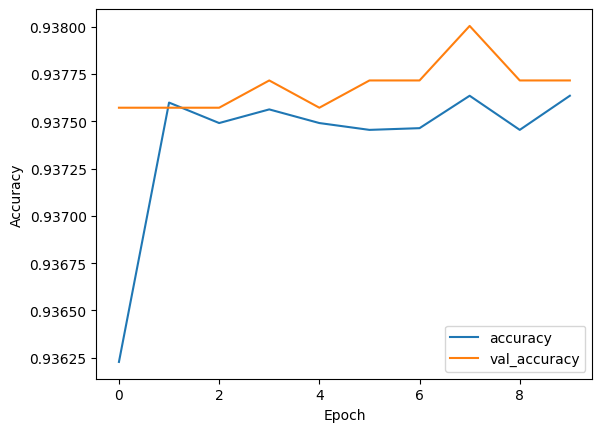

1/1 [==============================] - 0s 274ms/step


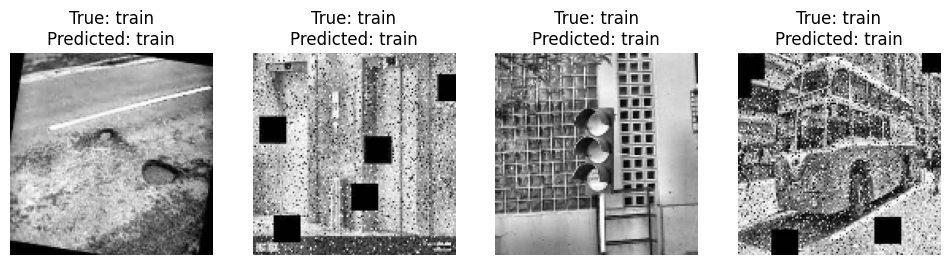

In [9]:
#CNN MODEL IN PREPROCESS CODE WITH PREDICTED RESULT

import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# FUNCTION TO LOAD AND PREPROESS IMAGES
def load_and_preprocess_images(directory, label, image_size=(128, 128), clahe_clip_limit=2.0):
    images = []
    labels = []

    for filename in os.listdir(directory):
        if filename.endswith(".jpg"):
            file_path = os.path.join(directory, filename)
            img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, image_size)

            # Apply CLAHE
            clahe = cv2.createCLAHE(clipLimit=clahe_clip_limit)
            img = clahe.apply(img)

            images.append(img)
            labels.append(label)

    return images, labels

# DATA PATH
train_path = "/kaggle/input/26-class-object-detection-dataset/Senior-Design-VIAD-4/train"
test_path = "/kaggle/input/26-class-object-detection-dataset/Senior-Design-VIAD-4/test"

# LOAD AND PREPROCESS IAMGE DATA
train_images, train_labels = load_and_preprocess_images(train_path, label="train")
test_images, test_labels = load_and_preprocess_images(test_path, label="test")

# ENSURE ALL NUMBER OF IMAGES HAS SAME DIMENSION
def reshape_images(images):
    return [img if len(img.shape) == 3 else np.expand_dims(img, axis=-1) for img in images]

train_images = reshape_images(train_images)
test_images = reshape_images(test_images)

# STORE IMAGES AND LABEL I LIST
all_images = train_images + test_images
all_labels = train_labels + test_labels

# CONVERT LIST TO NUMPY ARRAYS
images = np.array(all_images)
labels = np.array(all_labels)

# CONVERT LABELS TO NUMERIC FORMAT
label_encoder = LabelEncoder()
numeric_labels = label_encoder.fit_transform(labels)

# CONVERT LABELS TO ONE HOT ENCODING
one_hot_labels = to_categorical(numeric_labels, num_classes=26)

# NORMALIZE PIXEL VALUES
images = images / 255.0

# SPLIT DATA INTO TRAING AND TESTING SET
X_train, X_test, y_train, y_test = train_test_split(images, one_hot_labels, test_size=0.2, random_state=42)

# DATA AUGMENTATION
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# CNN MODEL
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(26, activation='softmax'))

# COMPLIE THE MODEL
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# TRAIN THE MODEL
batch_size = 32
epochs = 10

history = model.fit(datagen.flow(X_train, y_train, batch_size=batch_size),
                    steps_per_epoch=len(X_train) // batch_size,
                    epochs=epochs,
                    validation_data=(X_test, y_test),
                    shuffle=True)

# EVALUATE THE MODEL ON TEST SET
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc}")

# SHOW TRAIN HISTORY
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

# MAKE PREDICTION ON A FEW TEST IMAGE
predictions = model.predict(X_test[:4])

# SHOW THE ORGINAL AND PREDICTED LABEL ON TEST IMAGES
class_names = label_encoder.classes_
predicted_labels = [class_names[np.argmax(pred)] for pred in predictions]


fig, axes = plt.subplots(1, 4, figsize=(12, 3))
for i in range(4):
    axes[i].imshow(X_test[i].reshape(128, 128), cmap='gray')
    axes[i].set_title(f"True: {class_names[np.argmax(y_test[i])]}\nPredicted: {predicted_labels[i]}")
    axes[i].axis('off')
plt.show()
